In [168]:
from sklearn import datasets, metrics
from sklearn.metrics import calinski_harabasz_score
from sklearn.cluster import KMeans, AgglomerativeClustering

import scipy
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(10, 5)})

# Step 1 
Import	the	Iris	Dataset	from	SciKitLearn. 

In [169]:
# Load Dataset
iris = datasets.load_iris()
X = iris.data

# Step 2
Use	K-Means	to	build	2,	3,	4,	… 10	clusters.

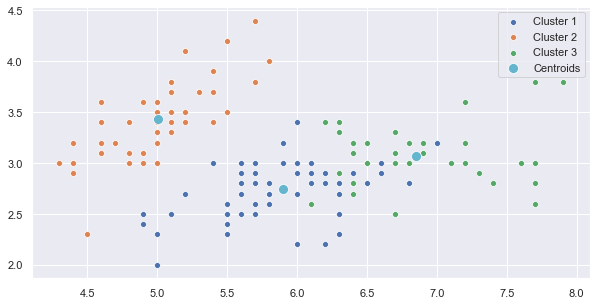

In [170]:
# function for KMeans Clustering
def KMC(clusters, data):
    k_means = KMeans(n_clusters=clusters, random_state=0)

    # Fit the data with the iris data set
    k_means = k_means.fit(data)
    return k_means

# test function
for k in range(2, 10):
    index = k-2
    test = KMC(k, X)
    
    # Number of centroids
    centroids = k_means.cluster_centers_
    # Number of clusters
    clusters = np.unique(test.labels_)
    
# Plot the clusters
for n in clusters:
    sns.scatterplot(X[y_kmeans == n, 0], X[y_kmeans == n, 1], label="Cluster " + str(n+1))

# Plot the centroids
sns.scatterplot(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s=100, label="Centroids")
plt.show()

# Step 3
Plot	values	of	the	within	cluster	distance	with	respect	to	the	number	of	clusters.

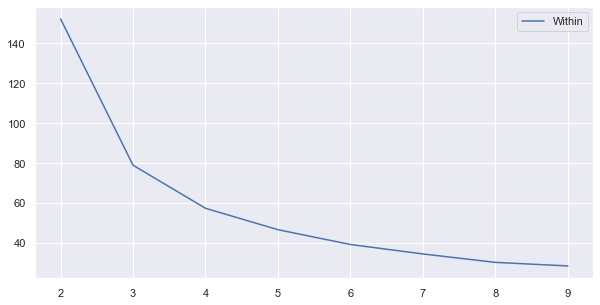

In [171]:
# Array to store within cluster distance
within = []
for k in range(2, 10):
    k_means = KMC(k, X)
    w_dist = k_means.inertia_
    
    # append data to array
    within.append(w_dist)
    
    # Number of centroids
    centroids = k_means.cluster_centers_
    # Number of clusters
    clusters = np.unique(test.labels_)

# create lineplot to plot values of the within cluster distance with respect to the number of clusters
within_plot = sns.lineplot(range(2, 10), within, label="Within")

# Step 4
Plot	values	of	the	between cluster	distance	with	respect	to	the	number	of	clusters.

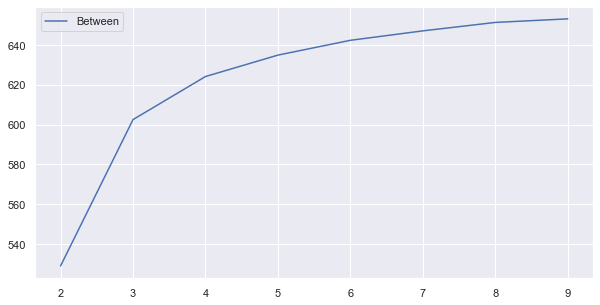

In [172]:
# Array to store between cluster distance
between = []

# We use kmean with 1 cluster and get centroid
k_means = KMeans(n_clusters=1, random_state=0)
k_means.fit_predict(X)
centr = k_means.cluster_centers_

for k in range(2, 10):
    k_means = KMeans(n_clusters=k, random_state=0)
    y_kmeans = k_means.fit_predict(X)
    
    # Number of centroids
    centroids = k_means.cluster_centers_
    # Number of clusters
    clusters = np.unique(k_means.labels_)
    
    # Between cluster distance
    dist = 0
    
    for n in clusters:
        cluster_k = X[y_kmeans == n]
        mean = np.mean(cluster_k, axis=0)
        dist += len(cluster_k) * np.sum((mean - centr) ** 2)

    # Append
    between.append(dist)

# create lineplot to plot values of the between cluster distance with respect to the number of clusters.
between_plot = sns.lineplot(range(2, 10), between, label="Between")

# Step 5
Plot	values	of	the	Calinski-Herbasz	index with	respect	to	the	number	of	clusters.

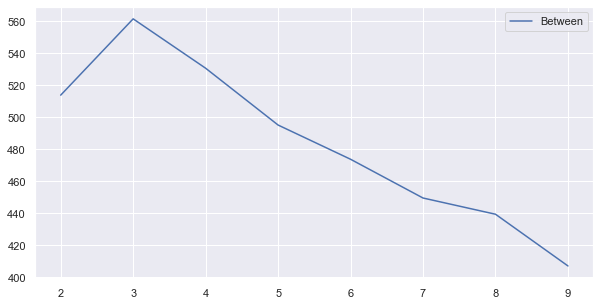

In [173]:
# Array to store Calinski-Herbasz index
chIndex = []

for k in range (2, 10):
    k_means = KMeans(n_clusters=k, random_state=0)
    y_kmeans = k_means.fit_predict(X)

    labels = k_means.labels_
    
    # use predefines CH function
    chIndex.append(calinski_harabasz_score(X, labels))

ch_plot = sns.lineplot(range(2, 10), chIndex, label="Between")

# Step 6 
##### Question: 
What	 is	 the	 natural	 cluster	 arrangement and	 why?

##### Ans:
Based on the plot above just by eye inspection we can clearly see that at cluster 3 the change of variance changes drastically. From the CH index plot we can also derive that the maximum inxex is 3. Meaning the natural cluster arrangement is 3.

Another proof is that the Iris data set has 3 uniques and different categories.

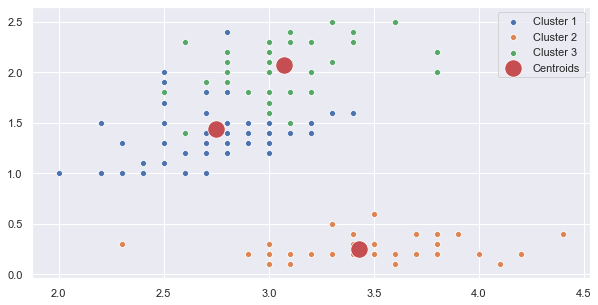

In [174]:
# we plot scatter plot with 3 clusters
k_means = KMC(3, X)
y_kmeans = k_means.fit_predict(X)
clusters = np.unique(k_means.labels_)

# Plotting of 3 clusters
for n in clusters:
    sns.scatterplot(X[y_kmeans == n, 1], X[y_kmeans == n, 3], label="Cluster " + str(n+1))

# Plotting the centroids
sns.scatterplot(k_means.cluster_centers_[:, 1], k_means.cluster_centers_[:, 3], s=300, label="Centroids")

# Step 7 
Use	Hierarchical	clustering	to	identify	arrangement	of	the	data-points. 

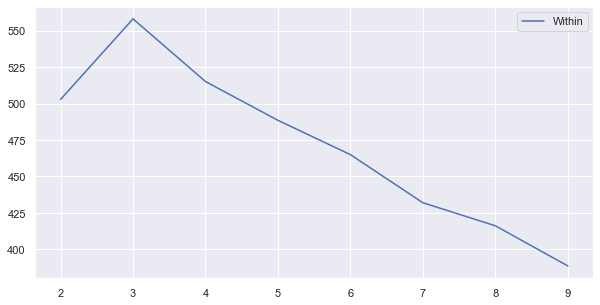

In [175]:
hc = []
# code learnt from https://www.youtube.com/watch?v=JcfIeaGzF8A
# funct to generate hierarchal clusters
for k in range(2, 10):
    h_cluster = AgglomerativeClustering(n_clusters = k, affinity='euclidean', linkage='ward')
    h_cluster.fit(X)
    labels = h_cluster.labels_
    
    hc.append(calinski_harabasz_score(X, labels))
    
hierarchal_plot = sns.lineplot(range(2, 10), hc, label="Within")

Text(0, 0.5, 'Distance')

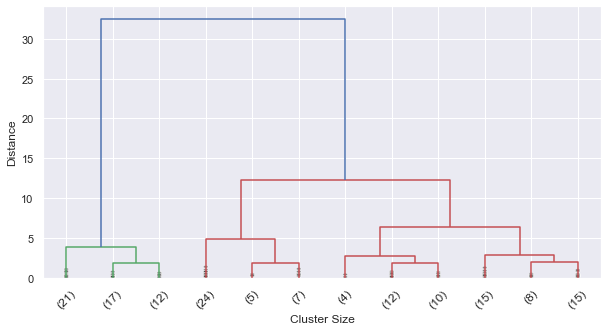

In [176]:
# code learnt from https://www.youtube.com/watch?v=JcfIeaGzF8A
hx = iris.data[:]

Z = linkage(hx, 'ward')
dendrogram(Z, truncate_mode='lastp', p = 12, leaf_rotation = 45., leaf_font_size = 12., show_contracted = True)
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

# Step 8
##### Question:
What	 is	 the	 natural	 arrangement	 there and	 why?

##### Answer:
The "hierarchal_plot" lineplot shows us that the natural arrangement once again is 3. this is proven where the peak of the moutain starts to drop. This is does make sense because there a 3 different categories on the data set.
